##PyTorch Workflow - Linear Regression

### 1. Data Preparation
- Load and prepared dataset
- Split data into training and testing set

In [223]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [224]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # features
y = weight * X + bias # labels

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [225]:
# Train/test split
train_split = int(0.8 * len(X)) # 80% training, 20% testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [226]:
# Plot train data, test data, and compares predictions
def plot_predictions (train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', s=4, label="Train data")
  plt.scatter(test_data, test_labels, c='g', s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  plt.legend(prop={"size":14});

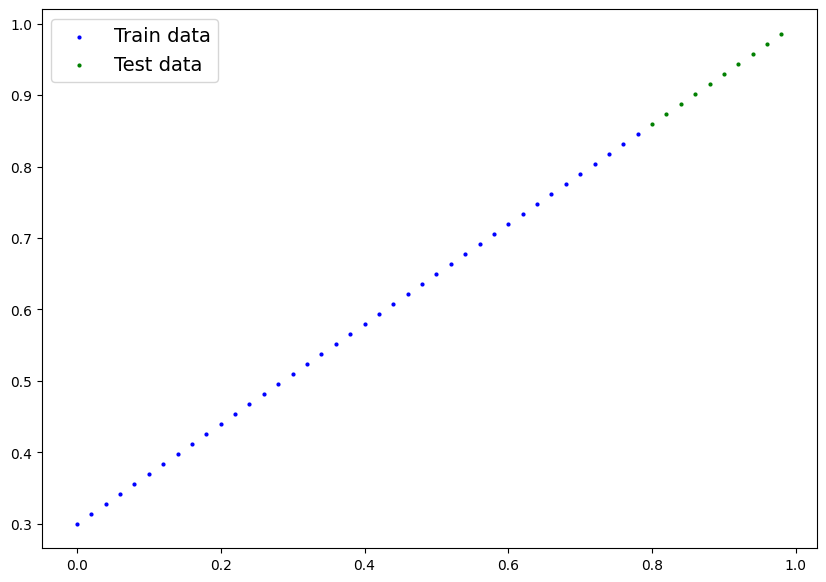

In [227]:
plot_predictions()

### 2. Build Model
Now we have some data, let's build a model that uses the blue dots to predict the green dots

In [228]:
# Linear Regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Initialize model parameters
    self.weights = nn.Parameter(torch.rand(1,
                                           dtype=torch.float),
                                requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype=torch.float),
                             requires_grad=True)

    # Forward defines the computation in model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # linear regression (y = mx + bz)

In [229]:
torch.manual_seed(42)

# Create an instance of the model (subclass of nn.Module that contains nn.Parameters(s))
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [230]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

In [231]:
# Make predictions with model (with random parameters before training)
with torch.no_grad():
  y_preds = model_0(X_test)

print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions samples: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions samples: 10
Predicted values:
tensor([[0.0677],
        [0.0853],
        [0.1030],
        [0.1206],
        [0.1382],
        [0.1559],
        [0.1735],
        [0.1912],
        [0.2088],
        [0.2265]])


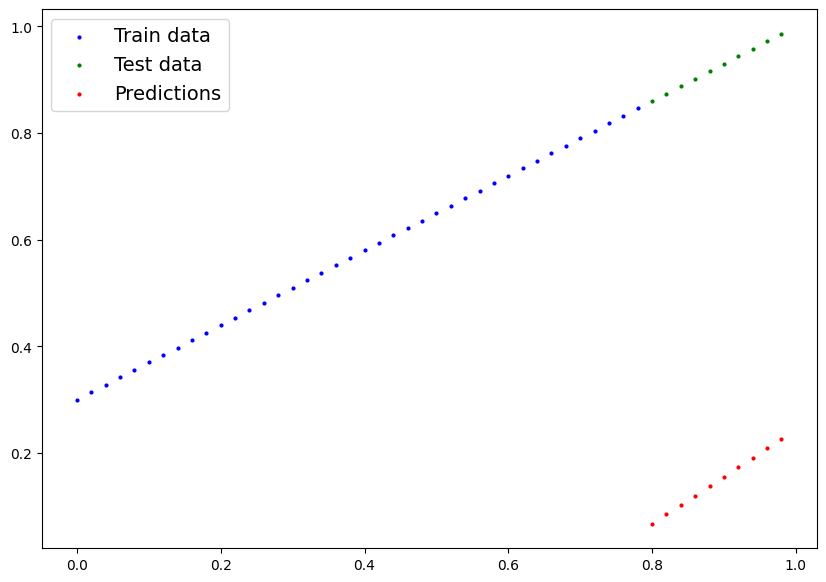

In [232]:
plot_predictions(predictions=y_preds)

In [233]:
y_test - y_preds

tensor([[0.7923],
        [0.7887],
        [0.7850],
        [0.7814],
        [0.7778],
        [0.7741],
        [0.7705],
        [0.7668],
        [0.7632],
        [0.7595]])

### 3. Train Model

In [234]:
# Create loss function
loss_fn = nn.L1Loss() # Mean absolute error (MAE)

# Create optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.05)


In [235]:
# Training loop

torch.manual_seed(42)

epoches = 100;
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epoches):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()

  with torch.no_grad():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.8670692443847656 | MAE Test Loss: 0.7085794806480408
Epoch: 10 | MAE Train Loss: 0.2910190522670746 | MAE Test Loss: 0.03516530245542526
Epoch: 20 | MAE Train Loss: 0.084347665309906 | MAE Test Loss: 0.18828432261943817
Epoch: 30 | MAE Train Loss: 0.06703945994377136 | MAE Test Loss: 0.15379178524017334
Epoch: 40 | MAE Train Loss: 0.04987334832549095 | MAE Test Loss: 0.11242978274822235
Epoch: 50 | MAE Train Loss: 0.03267933800816536 | MAE Test Loss: 0.07106772065162659
Epoch: 60 | MAE Train Loss: 0.015529823489487171 | MAE Test Loss: 0.033140093088150024
Epoch: 70 | MAE Train Loss: 0.0225929394364357 | MAE Test Loss: 0.05509719252586365
Epoch: 80 | MAE Train Loss: 0.0225929394364357 | MAE Test Loss: 0.05509719252586365
Epoch: 90 | MAE Train Loss: 0.0225929394364357 | MAE Test Loss: 0.05509719252586365


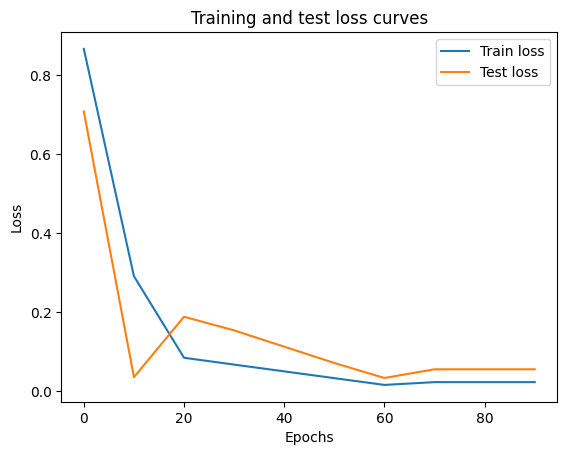

In [236]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [237]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.7207])), ('bias', tensor([0.2693]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


### 4. Make predictions with a trained PyTorch model (inference)


In [238]:
model_0.eval()
with torch.no_grad():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8459],
        [0.8603],
        [0.8747],
        [0.8891],
        [0.9035],
        [0.9179],
        [0.9324],
        [0.9468],
        [0.9612],
        [0.9756]])

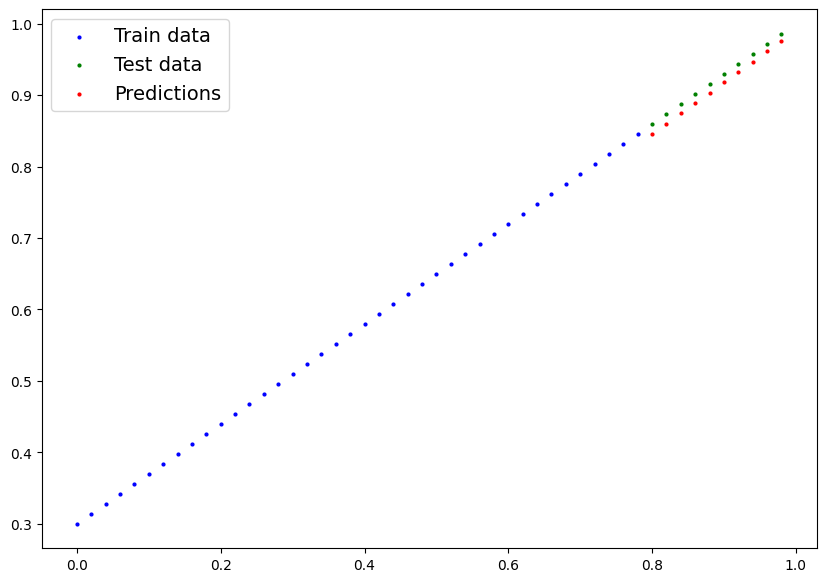

In [239]:
plot_predictions(predictions=y_preds)